In [1]:
import gbspy as g
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

import multiprocessing as mp
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator

#import sys  
#sys.path.insert(0, '/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy')

# Get the current working directory|
cwd = os.getcwd()


# DN tria delta scan

#os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DNT_dn0p6')
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_d0p6')
#os.chdir('/marconi/home/userexternal/klim0000/scratch/GBS/DN_tria/delta_scan/DPT_test')

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Load GBS simulations
s=g.Sim()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Current working directory: /marconi/home/userexternal/klim0000/jupyter_notebook/GBS_DN_tria


/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy/pp.py:62: FutureWarning: An error has occured when reading the result index from the HDF5 contents:

Traceback (most recent call last):
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy/pp.py", line 55, in _read_file_index_from_result
    with h5py.File(path, "r") as f:
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/h5py/_hl/files.py", line 533, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/h5py/_hl/files.py", line 226, in make_fid
    fid = h5f.open(name, flags, fapl=fapl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 106, in h5py.h5f.open
OSError: Unable to open file (

An error occured when opening /marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_d0p6/results_69.h5:
Unable to open file (file signature not found)
Trying to skip the file...
Last results file skipped


In [2]:
t2= s.time[-1]
t1= t2 

# Entire torus
z1 = s.z[0]
z2 = s.z[-1]
iz = s.find_ind(z2, s.z)
bsign = s.attribute["B0sign"]

dens  = s.get_field('Te',  z1=z1, z2=z2, t1=t1, t2=t2)
dens_avg  = np.mean(dens, axis=(2,3));

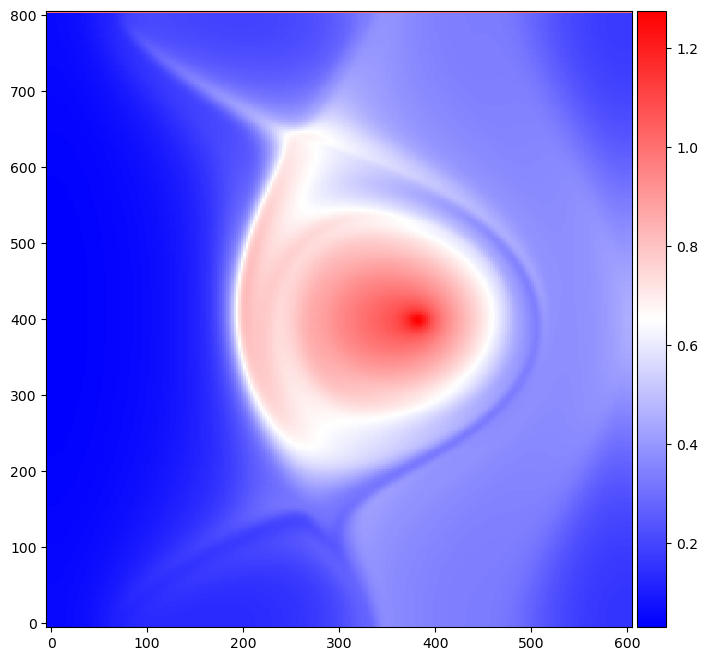

In [3]:
X, Y = np.meshgrid(s.x, s.y)
fig, ax = plt.subplots(dpi=100, sharex=True, sharey=True)

cs = ax.pcolormesh(X, Y, dens_avg, cmap='bwr')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=10)


(10.0, 590.0)

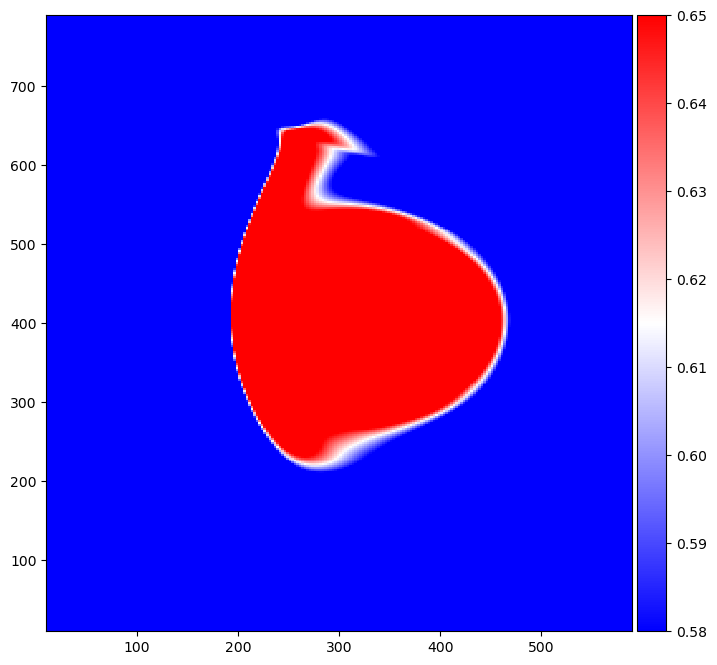

In [4]:
X, Y = np.meshgrid(s.x, s.y)
fig, ax = plt.subplots(dpi=100, sharex=True, sharey=True)

cs = ax.pcolormesh(X, Y, dens_avg, cmap='bwr', vmin=0.58, vmax=0.65)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=10)
ax.set_ylim([10,790])
ax.set_xlim([10,590])